# Geometric Operations using OpenCV

In the first part of the lab, you will apply geometric transformations to an image. This allows you to perform different operations like reshape translation i.e. to shift, reshape and rotate the image. In the second part of the lab, you will learn how to apply some basic array and matrix operations to the image.

Geometric Operations<br>
Scaling<br>
Translation<br>
Rotation<br>
Mathematical Operations<br>
Array Operations<br>
Matix Operations n

In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

First, let's define a helper function to plot two images side-by-side. You will not need to understand this code this moment, but this function will be used repeatedly in this tutorial to showcase the results.

In [2]:
def plot_image(image_1, image_2, title_1 = "Original", title_2 = "New Image"):
    plt.figure(figsize=(10,10))
    plt.subplot(1,2,1)
    plt.imshow(image_1, cmap="gray")
    plt.title(title_1)
    plt.subplot(1,2,2)
    plt.imshow(image_2, cmap='gray')
    plt.title(title_2)
    plt.show()

# Geometric Transformations
Geometric transformations allow you to perform different operations like translation i.e. to shift, reshape and rotate the image.

<h2>Scaling</h2>
We can resize an image using the function resize() from cv2 module for this purpose. You can specify the scaling factor or the size of the image:

Consider the following image with the corresponding intensity values:

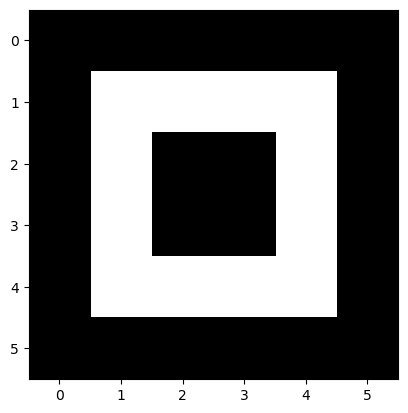

array([[  0.,   0.,   0.,   0.,   0.,   0.],
       [  0., 255., 255., 255., 255.,   0.],
       [  0., 255.,   0.,   0., 255.,   0.],
       [  0., 255.,   0.,   0., 255.,   0.],
       [  0., 255., 255., 255., 255.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.]])

In [3]:
toy_image = np.zeros((6,6))
toy_image[1:5, 1:5] = 255
toy_image[2:4,2:4] = 0
plt.imshow(toy_image, cmap = 'gray')
plt.show()
toy_image

We can rescale along a specific axis:

fx: scale factor along the horizontal axis<br>
fy: scale factor along the vertical axis<br>
The parameter interpolation estimates pixel values based on neighboring pixels. INTER_NEAREST uses the nearest pixel and INTER_CUBIC uses several pixels near the pixel value we would like to estimate.

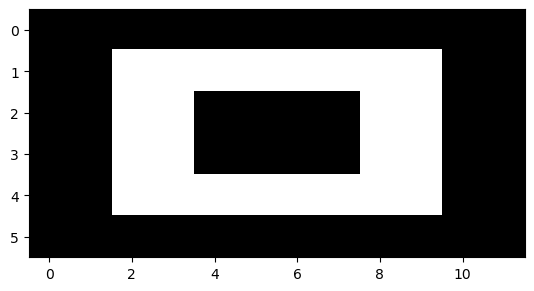

In [4]:
new_toy = cv2.resize(toy_image, None, fx=2, fy=1, interpolation = cv2.INTER_NEAREST)
plt.imshow(new_toy, cmap='gray')
plt.show()

ValueError: 4 is not a valid value for cmap; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r'

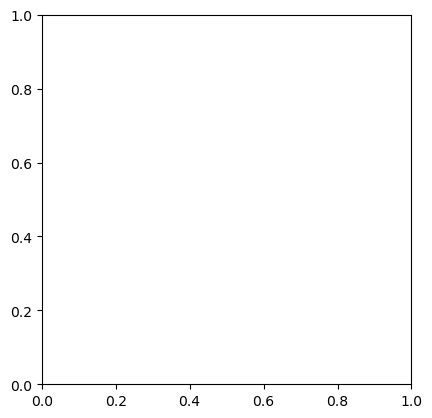

In [5]:
image = cv2.imread("lenna.png")
plt.imshow(image, cv2.COLOR_BGR2RGB)
plt.show()